In [13]:
#First, we import all the required Libraries in our project
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import numpy as np
import pandas as pd

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow.keras.backend as K
from skimage.io import imread
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import cv2
from sklearn.exceptions import ConvergenceWarning
from keras.preprocessing.image import load_img,img_to_array

K.clear_session()

In [14]:
traincsv = pd.read_csv("/kaggle/input/dataent/train.csv")
samplecsv = pd.read_csv('/kaggle/input/dataent/sample_submission.csv')

In [15]:
#Here we will take the image dataset required for Training and Testing
Datasplit_forTraining = "/kaggle/input/dataent/train"
Datasplit_forValidation  = "/kaggle/input/dataent/test"

In [16]:
#Its a display of all the Classes that we are using for Training
Classes_Targeted = traincsv['label']
print(Classes_Targeted )

0        0
1        1
2        0
3        0
4        0
        ..
18386    1
18387    2
18388    1
18389    1
18390    1
Name: label, Length: 18391, dtype: int64


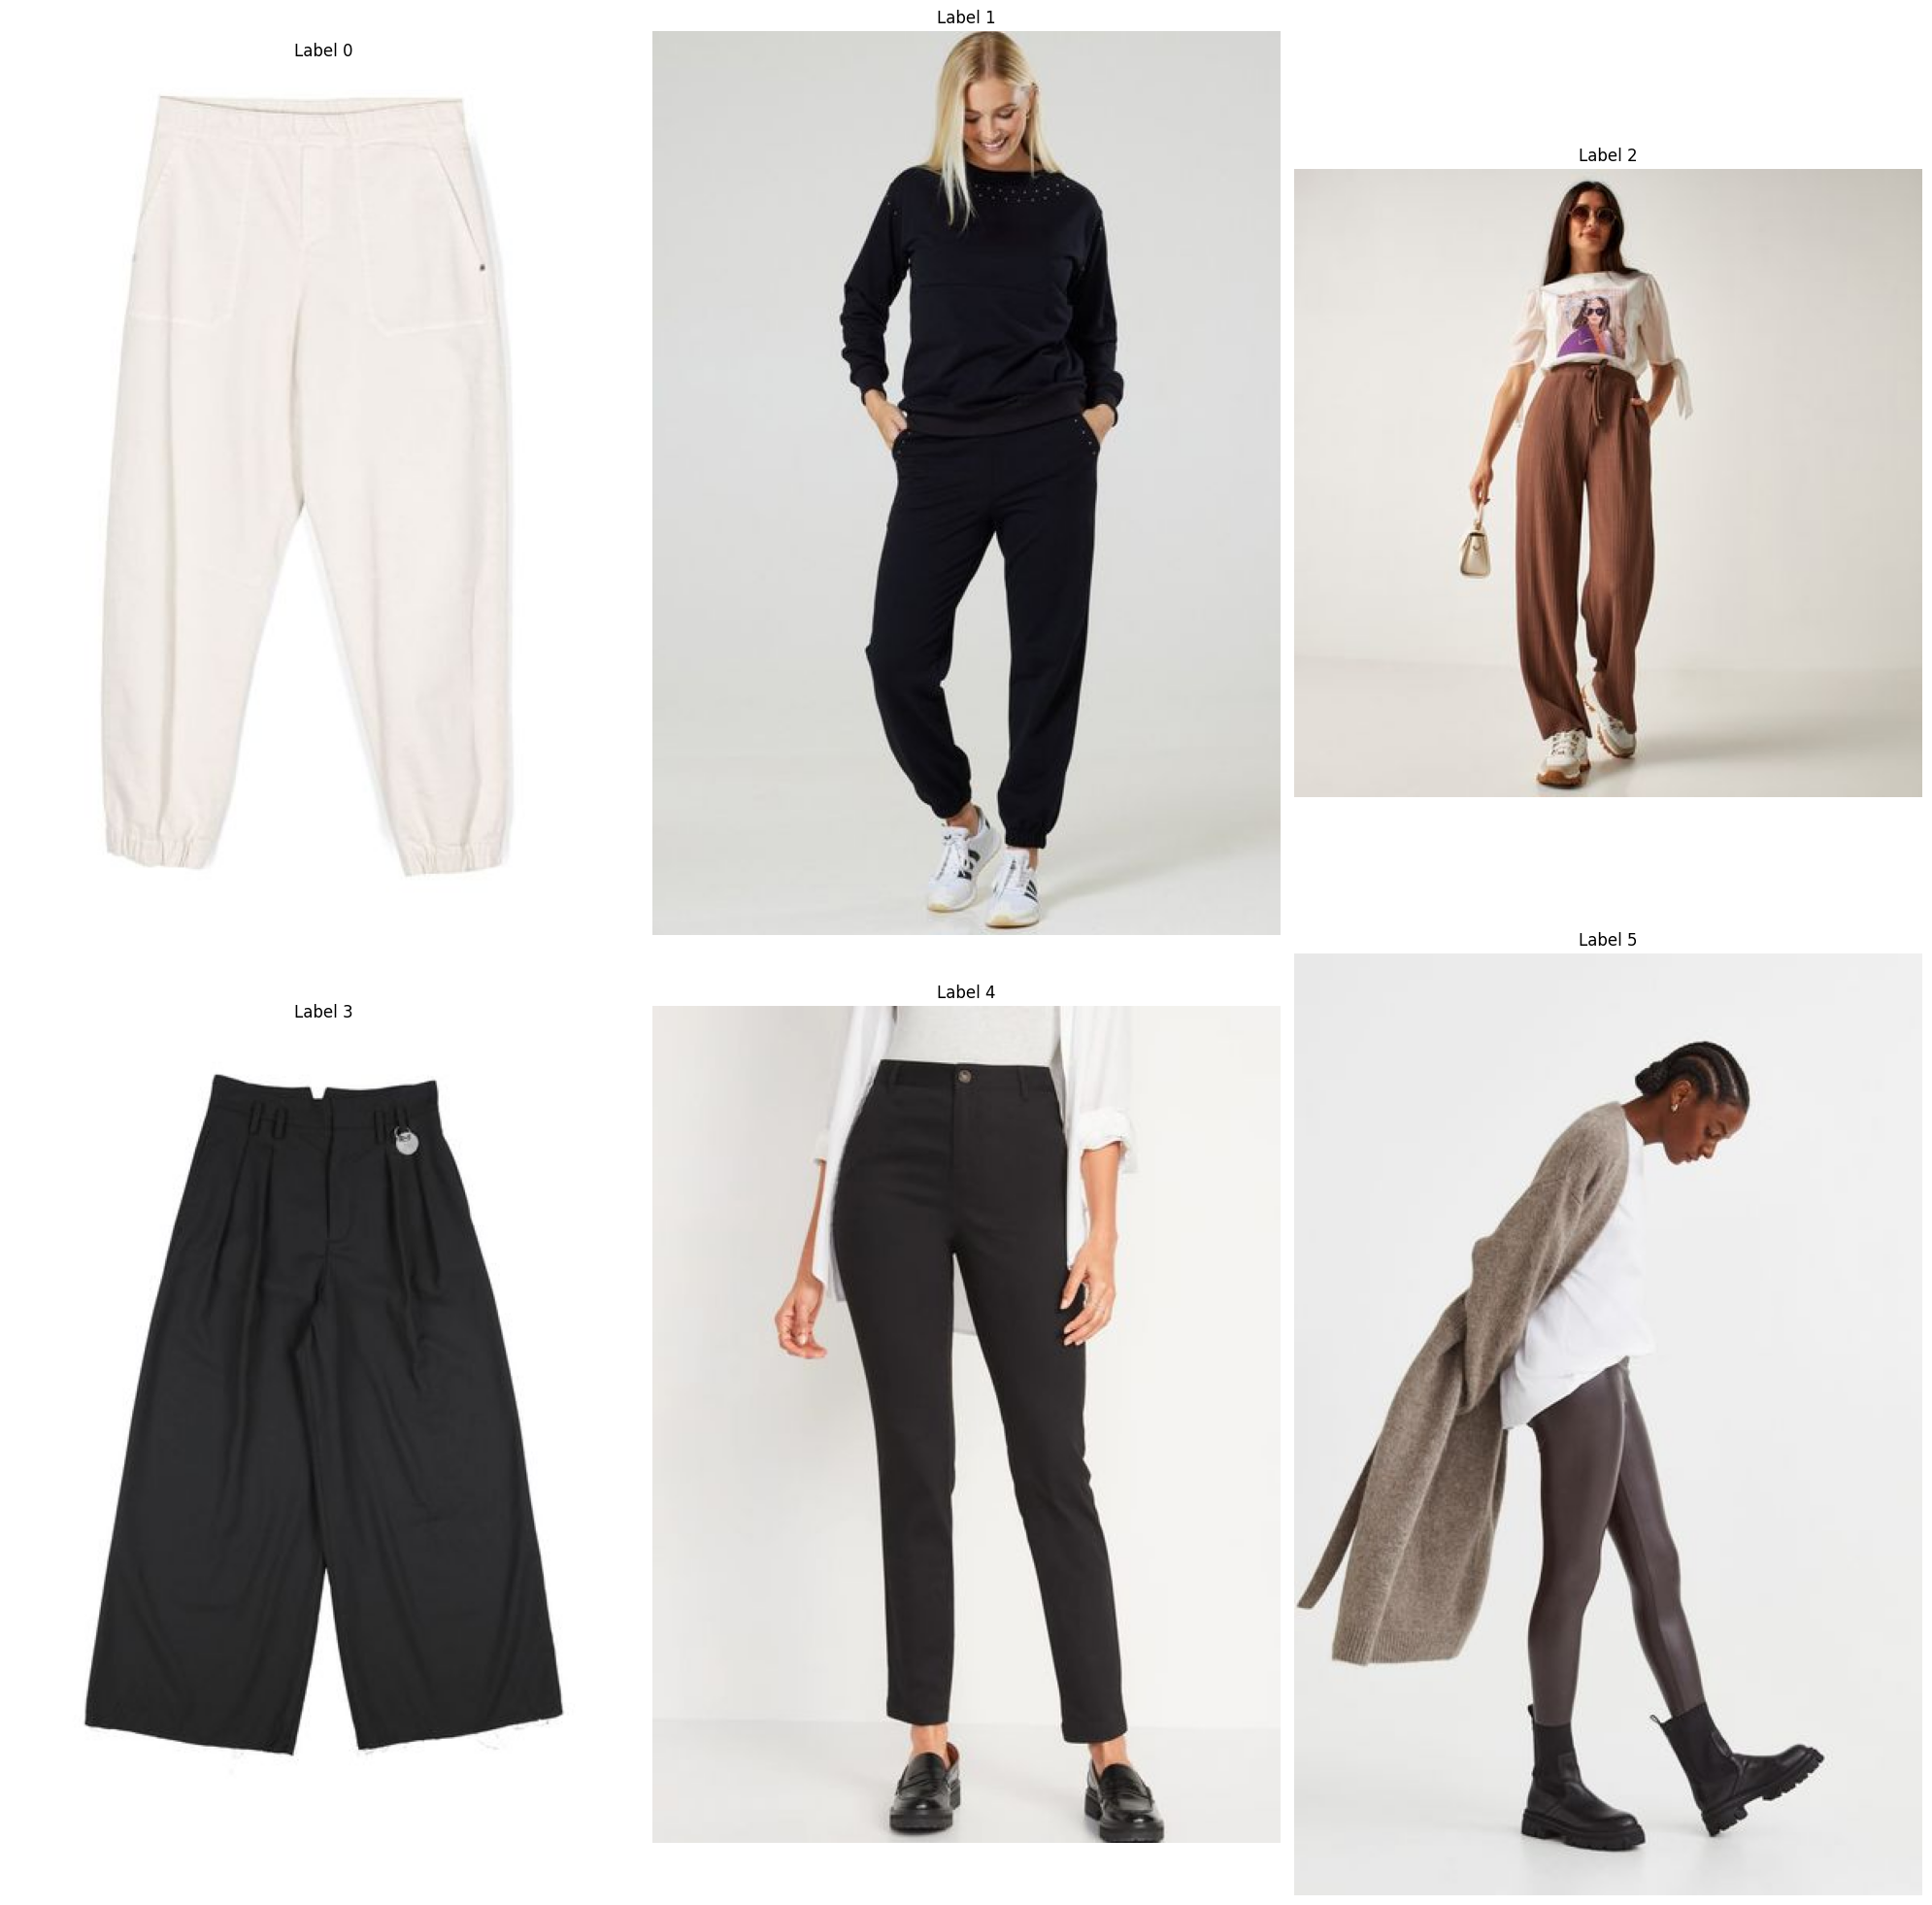

In [17]:
figure, a = plt.subplots(2,3, figsize=(20, 20))
a = a.flatten()
for x, axe in enumerate(a):
    if x >= len(traincsv['label'].unique()):
        axe.axis("off")
        continue
    blu = traincsv[traincsv['label'] == x]
    imageloc = os.path.join(Datasplit_forTraining, blu['file_name'].values[0])
    image = cv2.imread(imageloc)
    RGBimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axe.imshow(RGBimg)
    axe.set_title(f"Label {x}")
    axe.axis("off")
plt.tight_layout()
plt.show()

In [22]:
traincsv['label'] = traincsv['label'].astype(str)
gen  = ImageDataGenerator(rescale=1./255.,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,brightness_range=[0.8, 1.2],
horizontal_flip=True,validation_split=0.2,)

SizeofBatch = 200
HeightofImage = 250
WidthofImage = 250

train_generator = gen.flow_from_dataframe(traincsv,directory=Datasplit_forTraining,x_col='file_name',y_col='label',subset="training",color_mode="rgb",
target_size=(WidthofImage,HeightofImage),class_mode="categorical",batch_size=SizeofBatch,shuffle=True,)

validation_generator = gen.flow_from_dataframe(traincsv,directory=Datasplit_forTraining,x_col='file_name',y_col='label',subset="validation",color_mode="rgb",
target_size=(WidthofImage,HeightofImage),class_mode="categorical",batch_size=SizeofBatch,shuffle=True,)

Found 14713 validated image filenames belonging to 7 classes.
Found 3678 validated image filenames belonging to 7 classes.


In [23]:
SizeofBatch = 200
HeightofImage = 250
WidthofImage = 250
channels=3
input_shape=(WidthofImage,HeightofImage,channels)


model= tf.keras.models.Sequential([
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=7,activation='softmax')

])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 96)      2688      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 124, 124, 96)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 96)      83040     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 96)        83040     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 29, 29, 96)       

In [25]:
#We now compile the model using Adam Optimizer function and sparse_categorical_crossentropy as the loss function
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#We now fit our Alexnet model to the Training dataset with parameters as 10 epochs
mod = model.fit(train_generator,steps_per_epoch=train_generator.samples // SizeofBatch,validation_data=validation_generator,validation_steps=validation_generator.samples // SizeofBatch,epochs=13)

Epoch 1/13
73/73 [==============================] - 2793s 38s/step - loss: 1.8261 - accuracy: 0.2838 - val_loss: 1.9877 - val_accuracy: 0.2544
Epoch 2/13
73/73 [==============================] - 2827s 39s/step - loss: 1.7659 - accuracy: 0.3118 - val_loss: 2.0098 - val_accuracy: 0.2808
Epoch 3/13
17/73 [=====>........................] - ETA: 33:20 - loss: 1.7109 - accuracy: 0.3368

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
best_model=model.save_weights("model.h5")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Assuming you have already trained and have a model named 'best_model'
# You should replace the following variables with your actual values
train_path = '/kaggle/input/dataent/train'
test_path = '/kaggle/input/dataent/test'
img_width, img_height = 224, 224  # Adjust these dimensions based on your model's input size

# Load the sample CSV file
sam='/kaggle/input/dataent/sample_submission.csv'
sample = pd.read_csv(sam)

# Predictions
predictions = []
for image in sample.file_name:
    img = tf.keras.preprocessing.image.load_img(test_path + '/' + image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.image.resize(img, (img_width, img_height))
    img = tf.reshape(img, (-1, img_width, img_height, 3))
    prediction = model.predict(img / 255)
    predictions.append(np.argmax(prediction))

# Create submission DataFrame
my_submission = pd.DataFrame({'file_name': sample.file_name, 'label': predictions})

# Save to CSV
my_submission.to_csv('submission.csv', index=False)

# Print the first few rows of the generated submission file
print(my_submission.head())